<a href="https://colab.research.google.com/github/BhanuPShahi/-Taxi-Mobility-Surge-Price-Prediction/blob/main/Capstone_Project_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online Retail Customer Segmentation**



##### **Project Type**    - Clustering
##### **Contribution**    - Group


Github link : https://github.com/BhanuPShahi/Online-Retail-Customer-Segmentation

# **Problem Statement and Objective**


**Problem Overview**

In the project, the task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


**Objective:**

The primary goal of this project is to leverage transactional data for the purpose of delineating distinct customer segments using the RFM (Recency, Frequency, Monetary) model. The project aims to identify and characterize meaningful clusters within the customer base, allowing for a comprehensive understanding of their purchasing behaviors. By implementing RFM-based segmentation, the project seeks to facilitate targeted marketing strategies, personalized customer experiences, and informed decision-making. Ultimately, the objective is to enhance the ability to address key business questions through a nuanced understanding of customer segments derived from transactional patterns.


**What is Customer Segmentation ??**

Customer segmentation is the process of categorizing a customer base into distinct groups based on shared characteristics or behaviors. This allows businesses to tailor marketing strategies and services to meet the unique needs of each segment. Effective segmentation enhances personalization and improves overall customer satisfaction.


# ***Let's Begin !***

## ***1. Know Your Data***

Before we diving into the project, our initial step is to familiarize ourselves with the dataset. Let's load the data and take a look.

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
%matplotlib inline
from matplotlib import rcParams

from scipy.stats import *
import scipy.cluster.hierarchy as sch
import math

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataset
path = '/content/drive/MyDrive/AB/Cohort Nilgiri/Masters/Foundation/Module 6/Capstone/Online-Retail-Customer-Segmentation/Online Retail.xlsx'
df=pd.read_excel(path)

### Peek into data 👀

In [4]:
#First 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Last 5 rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# Dataset Rows & Columns
print(f'Shape of original dataframe:  {df.shape}')

Shape of original dataframe:  (541909, 8)


Based on the information above, it's apparent that the dataset ~ 5.4 lakh rows, each representing transactional data associated with customer purchases. The details include information about the product, the quantity purchased, the corresponding prices, and the source from which the products were acquired. Notably, the data is organized at the product level, indicating that a single invoice may encompass multiple products bought by a customer.

## ***2. Understanding Data & Initial Preprocessing***

Moving forward to the next stage, our focus is on gaining a deeper understanding of the data and undertaking the initial preprocessing steps. These initial preprocessing efforts are crucial for enhancing the usability of the data in subsequent analyses.

### **Understanding Data**

In [7]:
#Variables in the dataset
print(f'Variables in the dataset : {list(df.columns)}')

Variables in the dataset : ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


**Variables Description**

* **InvoiceNo   :**  Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode   :**  Item code. A 5-digit integral number uniquely to each item.
* **Description :**  Item name.
* **Quantity    :**  The quantity of each product (item) per transaction.
* **InvoiceDate :**  The day and time when each transaction was generated.
* **UnitPrice   :**  Product price per unit.
* **CustomerID  :**  Customer ID. A 5-digit integral number unique to each customer.
* **Country     :**  Country name where each customer resides.

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
# Dataset Describe
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [10]:
# Assuming your DataFrame is named 'df'
numeric_summary = df.describe()
object_summary = df.describe(include=['object'])

# Display the summaries
print("Numeric Summary:")
numeric_summary

Numeric Summary:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
print("\nObject Summary:")
object_summary


Object Summary:


,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


#### Duplicate Values

In [12]:
# Lets see if we have any duplicate rows

#Dataset Duplicate Value Count
print(f'Count of duplicate rows : {len(df[df.duplicated()])}')

Count of duplicate rows : 5268


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<Axes: >

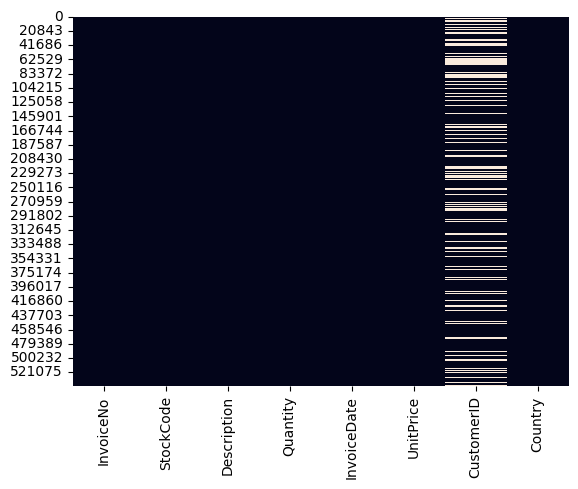

In [14]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### **Initial Preprocessing**
This step before EDA helps us to understand data easily further
1. Remove duplicates
2. Drop rows if null values in identifiers (CustomerID here)
3. Data type conversion
4. Drop rows which are cancelled transactions(these rows are not required for this segmentation)


In [15]:
# Modify dataframe by Droping duplicates based on all columns
df = df.drop_duplicates()
print('Shape of dataset after droping duplicates',df.shape)

Shape of dataset after droping duplicates (536641, 8)


In [16]:
# Drop rows with null values in customer ID
df = df.dropna(subset=['CustomerID'])
print('Shape of dataset after dropping rows with no customer ID',df.shape)

Shape of dataset after dropping rows with no customer ID (401604, 8)


In [17]:
# Data type conversion
columns_to_convert = ['InvoiceNo', 'Description', 'StockCode', 'CustomerID', 'Country']
df[columns_to_convert] = df[columns_to_convert].astype(str)

In [18]:
# Drop cancelled transactions
print("Total count of cancelled items are", df[df['InvoiceNo'].str.contains('C')].shape[0])
df=df[~df['InvoiceNo'].str.contains('C')]
print('Shape of dataset after droping cancelled transactions',df.shape)

Total count of cancelled items are 8872
Shape of dataset after droping cancelled transactions (392732, 8)


In [19]:
print("Total Customers:", df['CustomerID'].nunique())
print("Total unique Transactions:", df['InvoiceNo'].nunique())
print("Total distinct Items sold:", df['StockCode'].nunique())
print("Total Countries:", df['Country'].nunique())

Total Customers: 4339
Total unique Transactions: 18536
Total distinct Items sold: 3665
Total Countries: 37


## ***3. Exploratory Data Analysis***

#### Chart-1 & Chart-2 Monthly Distribution of Transactions & Monthly Distribution of Revenue

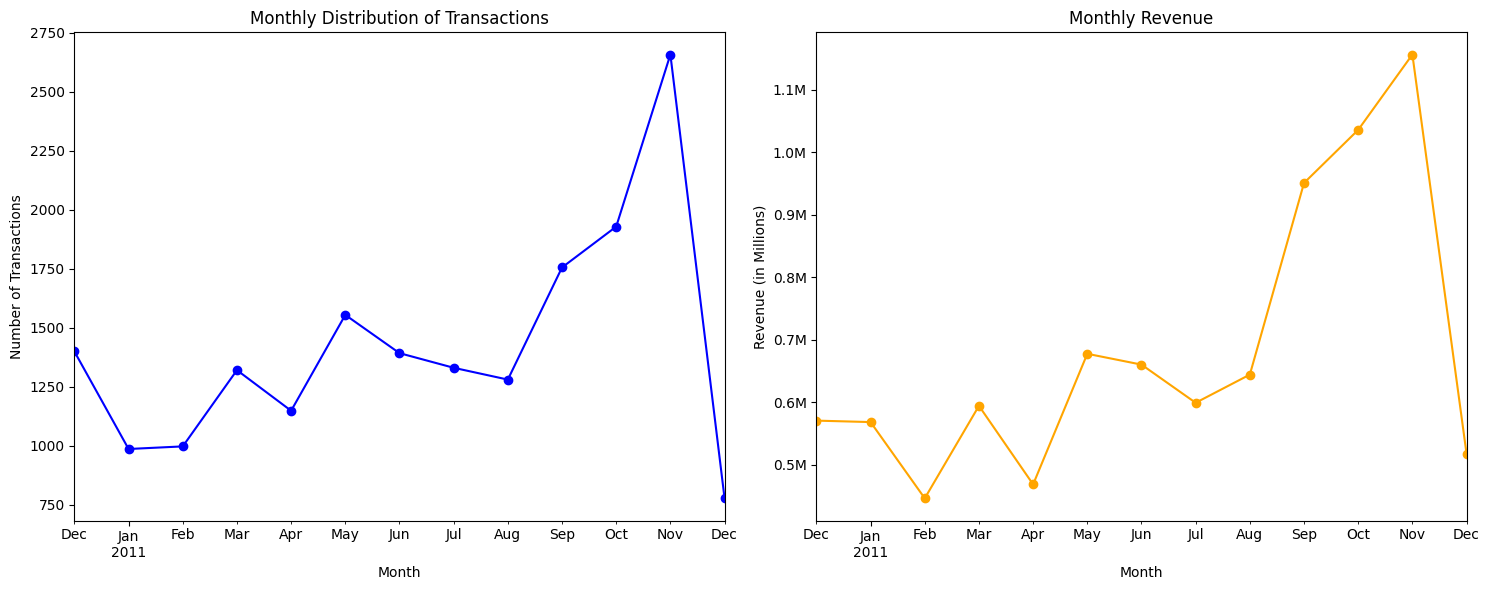

In [20]:
# Monthly Distribution of Transactions Over Time
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique().plot(marker='o', color='blue')
plt.title('Monthly Distribution of Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

# Monthly Revenue Over Time
plt.subplot(1, 2, 2)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df = df[df['Revenue'] > 0]
df.set_index('InvoiceDate')['Revenue'].resample('M').sum().div(1000000).plot(marker='o', color='orange')  # Convert to Millions
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (in Millions)')

# Add 'M' extension to y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}M'))

plt.tight_layout()
plt.show()

Chart -1 Distribution of Transactions Over Time

1. Why this chart? This line chart helps visualize the monthly distribution of transactions occuring over time.

2. Insights: Identify patterns or trends in transaction volume over time, detect seasonality, and assess the impact of time on business operations.

3. Business Impact: Understanding the temporal distribution of transactions can help optimize staffing, inventory management, and marketing strategies based on peak and off-peak periods.



Chart 2- Distribution of Monthly Revenue Over Time

1. Why this chart? A bar chart illustrates the monthly revenue over time.

2. Insights: Identify revenue trends, seasonality, and potential growth or decline periods.

3. Business Impact: Helps in financial planning, budgeting, and adjusting strategies based on revenue performance.

Chart 1 & Chart 2 combined view

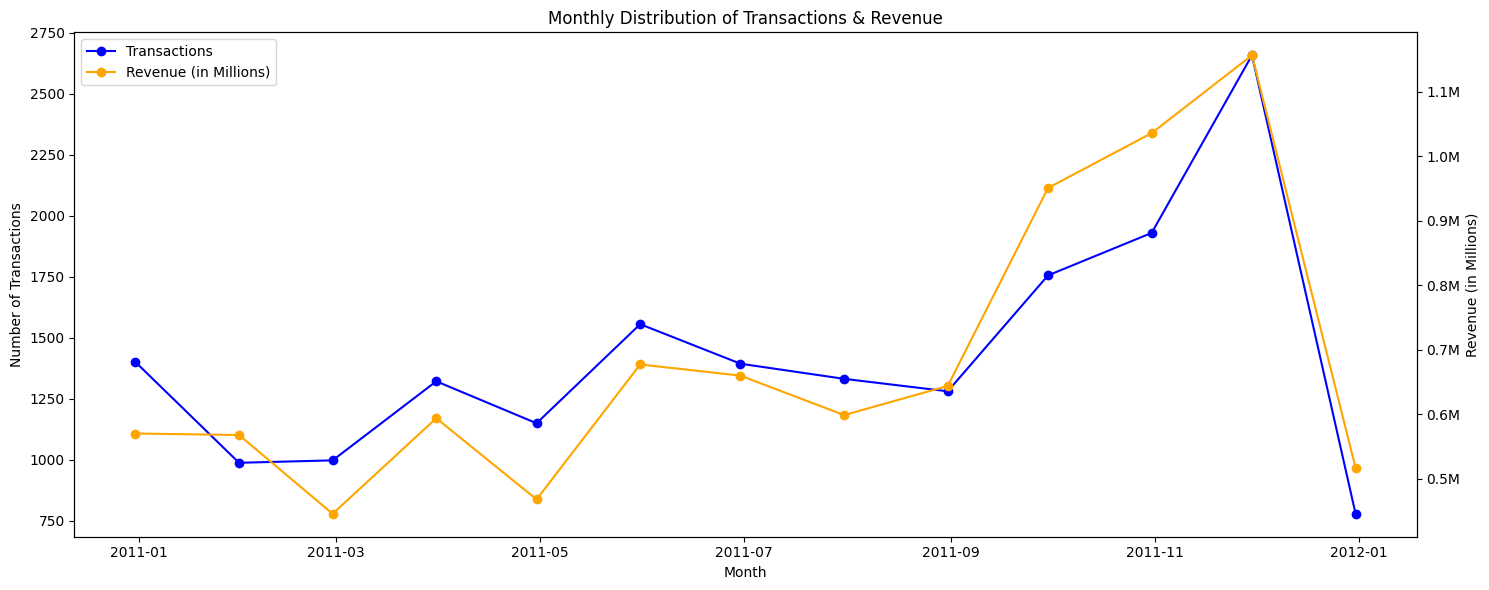

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming your DataFrame is named 'df'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df = df[df['Revenue'] > 0]

plt.figure(figsize=(15, 6))

# Monthly Distribution of Transactions Over Time
transactions_plot = plt.plot(df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique(), marker='o', color='blue', label='Transactions')
plt.title('Monthly Distribution of Transactions & Revenue')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

# Secondary y-axis for Revenue
ax2 = plt.gca().twinx()
revenue_plot = ax2.plot(df.set_index('InvoiceDate')['Revenue'].resample('M').sum().div(1000000), marker='o', color='orange', label='Revenue (in Millions)')
ax2.set_ylabel('Revenue (in Millions)')

# Add 'M' extension to y-axis ticks for Revenue
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}M'))

# Include separate legends for Transactions and Revenue
plots = transactions_plot + revenue_plot
labels = [plot.get_label() for plot in plots]
plt.legend(plots, labels, loc='upper left')

plt.tight_layout()
plt.show()


#### Chart -3 Distribution of Customers Across Countries

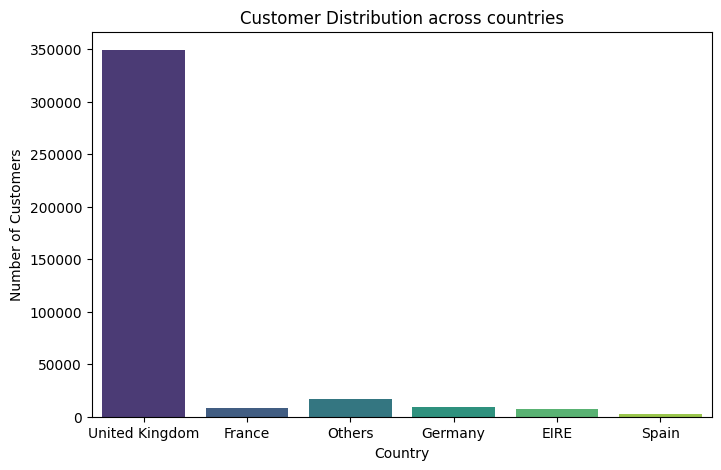

In [22]:
#Customer Distribution Across Countries
top_countries = df['Country'].value_counts().head(5).index

# Create a new column 'Country_Grouped' to represent the top 5 countries and 'Others'
df['Country_Grouped'] = df['Country'].apply(lambda x: x if x in top_countries else 'Others')

# Plot the count of customers in each country group
plt.figure(figsize=(8, 5))
sns.countplot(x='Country_Grouped', data=df, palette='viridis')
plt.title('Customer Distribution across countries')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Drop the temporary 'Country_Grouped' column - not needed for further analysis
#df.drop('Country_Grouped', axis=1, inplace=True)

1. Why this chart? A countplot provides a visual representation of the distribution of customers across different countries.

2. Insights: Identify the countries with the highest customer concentration.

3. Business Impact: Tailor marketing strategies, promotions, or product offerings based on the countries with the highest customer base to maximize impact and revenue.

#### Chart - 4 Distribution of quantity of item sold in a transaction

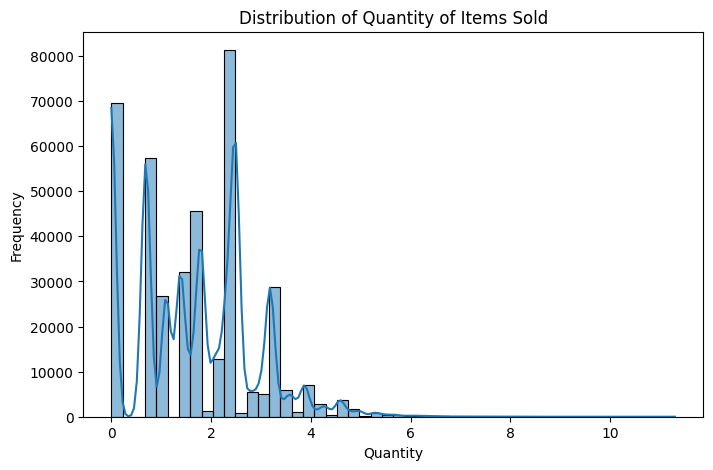

In [23]:
#Quantity of Items Sold Distribution

plt.figure(figsize=(8, 5))
sns.histplot(np.log(df['Quantity']), bins=50, kde=True)
plt.title('Distribution of Quantity of Items Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

1. Why this chart? A histogram shows the distribution of quantities of items sold.

2. Insights: Understand the distribution of the quantity of items sold, identify outliers.

3. Business Impact: Helps in inventory management by identifying frequently sold quantities and outliers that may need special attention.

#### Chart 5 - Top Selling Products - Popular

<Figure size 800x500 with 0 Axes>

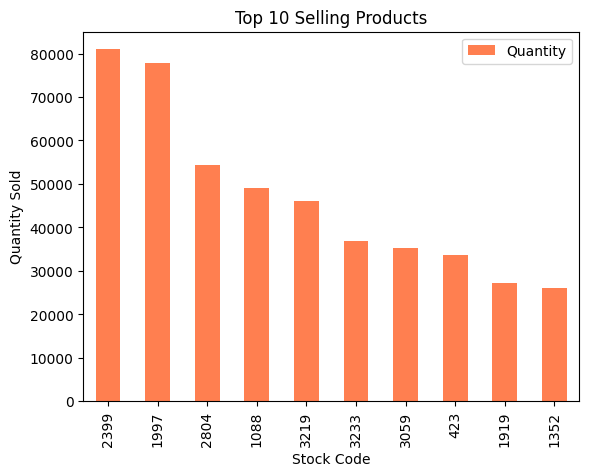

In [24]:
plt.figure(figsize=(8, 5))
df_top = df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False )
top_products = df_top.head(10)
top_products.plot(kind='bar', color='coral')
plt.title('Top 10 Selling Products')
plt.xlabel('Stock Code')
plt.ylabel('Quantity Sold')
plt.show()

1. Why this chart? A horizontal bar chart displays the top-selling products.

2. Insights: Identify the best-performing products in terms of sales volume.

3. Business Impact: Helps in inventory management, highlighting popular products that might need special attention or promotions.

#### Chart 6 - Top Revenue generating products

<Figure size 800x500 with 0 Axes>

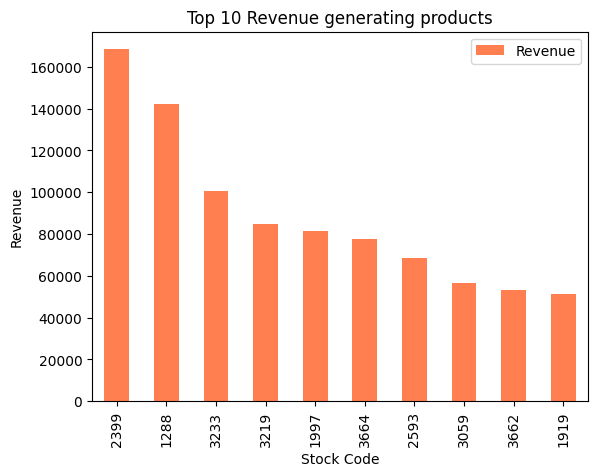

In [25]:
plt.figure(figsize=(8,5))
df_rev = df.groupby('StockCode')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False )
top_products = df_rev.head(10)
top_products.plot(kind='bar', color='coral')
plt.title('Top 10 Revenue generating products')
plt.xlabel('Stock Code')
plt.ylabel('Revenue')
plt.show()

1. Why this chart? A horizontal bar chart displays the top-selling products.

2. Insights: Identify the best-performing products in terms of revenue generation

3. Business Impact: Helps in top revenue generation products

#### Chart 7 - Customer Purchase Frequency

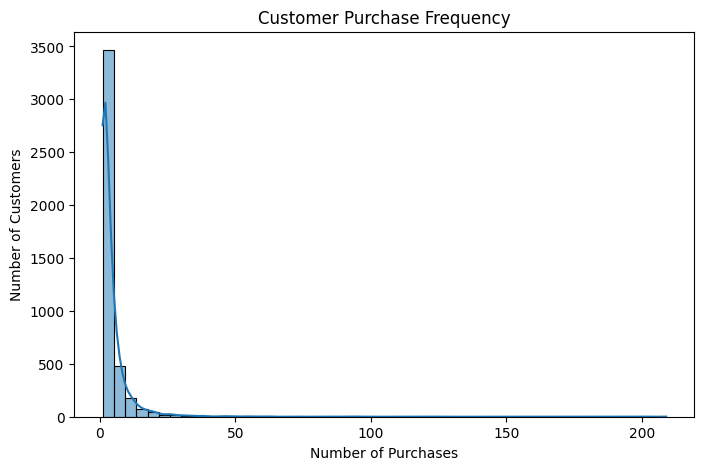

In [26]:
plt.figure(figsize=(8, 5))
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
sns.histplot(purchase_frequency, bins=50, kde=True)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

1. Why this chart? A histogram depicts the distribution of customer purchase frequencies.

2. Insights: Understand how often customers make purchases.

3. Business Impact: Target marketing efforts based on customer segments, such as frequent buyers or occasional shoppers.

#### Chart 8 - Distribution of transaction by Weekday

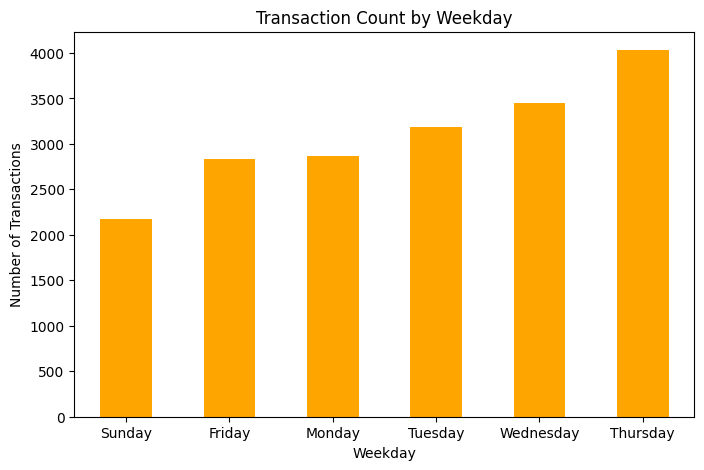

In [27]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract weekday from 'InvoiceDate' and format as day names
df['Weekday'] = df['InvoiceDate'].dt.strftime('%A')

# Create a bar chart for weekday vs. transaction count
plt.figure(figsize=(8, 5))
df.groupby('Weekday')['InvoiceNo'].nunique().sort_values(ascending=True).plot(kind='bar', color='orange')
plt.title('Transaction Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

1. Why this chart?
To visualize the distribution of transaction counts across weekdays, providing insights into sales patterns and identifying peak days.

2. Insights:
The chart highlights varying transaction counts by weekday, offering insights into peak sales days and opportunities for targeted marketing. Saturday is a holiday ? No transactions on that day

3. Business Impact:
Enables strategic resource allocation, staffing, and marketing efforts, optimizing business operations based on observed transaction patterns.

#### Chart 9 - Top 15 Customers by Trasactions

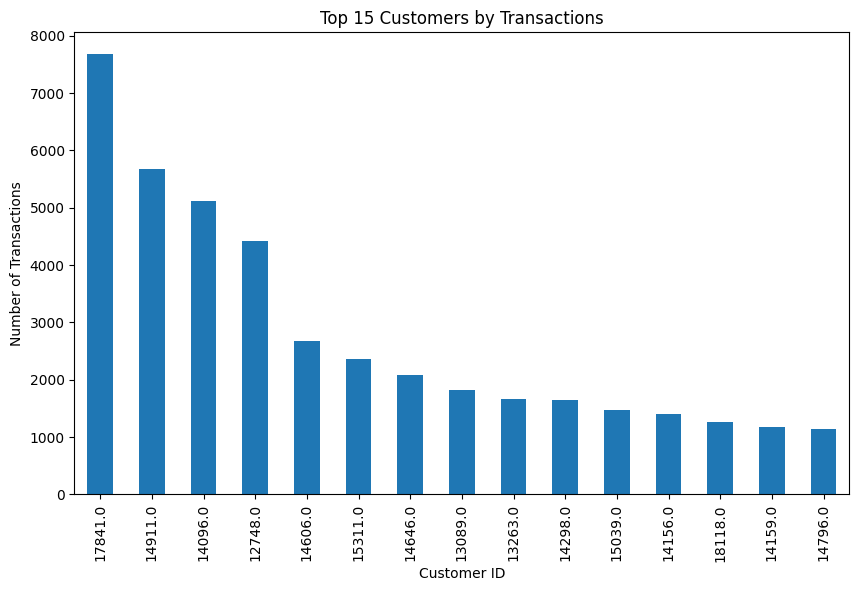

In [28]:
plt.figure(figsize=(10, 6))
df['CustomerID'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Customers by Transactions')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.show()

1. Why this chart? A bar chart displays the top 15 customers based on transaction count.

2. Insights: Identifies the most valuable customers in terms of transaction count.

3. Business Impact: Guides customer relationship management strategies and loyalty programs.

#### Chart 10 - Country vs. Invoice Date vs. Revenue Heatmap

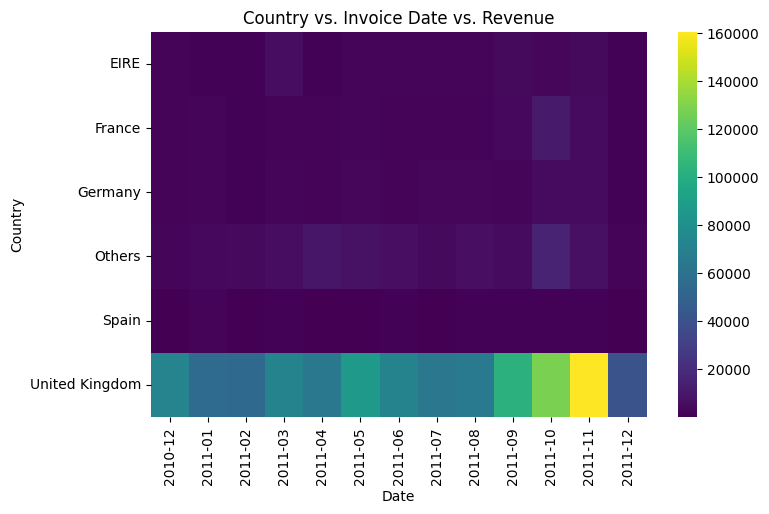

In [29]:
heatmap_data = df.groupby(['Country_Grouped', df['InvoiceDate'].dt.to_period('M')])['UnitPrice'].sum().unstack().fillna(0)

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Country vs. Invoice Date vs. Revenue')
plt.xlabel('Date')
plt.ylabel('Country')
plt.show()

1. Why this chart? A heatmap explores how revenue varies across different countries and dates.

2. Insights: Identifies patterns in revenue generation over time and in different regions.

3. Business Impact: Guides international marketing strategies and helps plan for revenue fluctuations.

### Overall Insights

1. Sep, Oct, Nov are where customers are very active. In Sep, Oct customers tendency to buy high priced items compared to in Nov
2. Top 5 countries from where customers are expected from UK, France, Germany, Spain, EIRE.
3. Customer Segmentation based on quantity of items bought is performable as the distribution is too wide.
4. Customer Frequency can be another segmentation
5. No transactions recorded on Saturday. Thursday seems popular to purchases.
6. Top 15 Customers, Top 10 products by transaction count, Top 10 products by revenue are seen.
7. UK purchased mostly in November, France purchased mostly in October, EIRE purchased mostly in March

## ***4. Hypothesis Testing***

Let's generate a set of questions and assumptions that naturally arise from the data, and then proceed to validate their accuracy through further analysis.

1. Does recent customers spend more ?
2. Do frequent customers spend large or small amount at a time ?
3. Do customers spend differently based on the time of the day?
4. Do customers spend differently on weekdays compared to weekends?
5. Do new customers spend differently compared to existing customers?

### Hypothetical Statement - 1

#### Null and Alternate Hypothesis Statement

**Null Hypothesis (H0):** The average spending of recent customers is equal to or less than the average spending of non-recent customers.

**Alternative Hypothesis (H1):** The average spending of recent customers is greater than the average spending of non-recent customers.

#### Statiscal test

In [30]:
from scipy.stats import ttest_ind

# Considering Last 30 days are recent days
recent_time_frame = max(df.InvoiceDate) - pd.DateOffset(days=30)

# Create a column 'RecentCustomer' indicating recent (1) or non-recent (0) customers
df['RecentCustomer'] = (df['InvoiceDate'] >= recent_time_frame).astype(int)

# Assuming 'Revenue' is the total revenue for each transaction (Quantity * UnitPrice)
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Assuming you want to compare the revenue of recent and non-recent customers
recent_customers = df[df['RecentCustomer'] == 1]['Revenue']
non_recent_customers = df[df['RecentCustomer'] == 0]['Revenue']

# Perform one-sided t-test
t_stat, p_value = ttest_ind(recent_customers, non_recent_customers, alternative='greater')

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine statistical significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Recent customers generate more revenue.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that recent customers generate more revenue.")


T-statistic: -1.5010324196545854
P-value: 0.9333260097269493
Fail to reject the null hypothesis. There is no significant evidence that recent customers generate more revenue.


#### What is the statiscal test choosen to obtain P - value and Why ?

* The t-statistic is often used for hypothesis testing when comparing means between two groups, as in the case of comparing the average spending of recent and non-recent customers.

* The t-statistic is used because it helps assess whether the observed difference in sample means is statistically significant, considering the variability within the samples. This is particularly important when dealing with small sample sizes. The p-value associated with the t-statistic indicates the probability of obtaining the observed difference (or more extreme) if the null hypothesis is true.

### Hypothetical Statement - 2

#### Null and Alternate Hypothesis Statement

**Null Hypothesis (H0):** The average spending per transaction for frequent customers is equal to the average spending per transaction for non-frequent customers.

**Alternative Hypothesis (H1):**

For a one-tailed test: The average spending per transaction for frequent customers is greater than the average spending per transaction for non-frequent customers.
For a two-tailed test: The average spending per transaction for frequent customers is different (either larger or smaller) than the average spending per transaction for non-frequent customers.

#### Statiscal test

In [31]:

from scipy.stats import ttest_ind

# You can define 'FrequentCustomer' based on your criteria (e.g., number of transactions within a certain period)
df['FrequentCustomer'] = (df.groupby('CustomerID')['InvoiceNo'].transform('nunique') > 5).astype(int)

# Assuming 'Revenue' is the total revenue for each transaction (Quantity * UnitPrice)
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Assuming you want to compare the spending per transaction of frequent and non-frequent customers
frequent_customers = df[df['FrequentCustomer'] == 1]['Revenue']
non_frequent_customers = df[df['FrequentCustomer'] == 0]['Revenue']

# Perform two-sided t-test
t_stat, p_value = ttest_ind(frequent_customers, non_frequent_customers)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine statistical significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in spending per transaction.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of a difference in spending per transaction.")


T-statistic: 7.685974674797907
P-value: 1.5218558074926603e-14
Reject the null hypothesis. There is a significant difference in spending per transaction.


In [32]:
# Perform one-sided t-test
t_stat, p_value = ttest_ind(frequent_customers, non_frequent_customers,  alternative = 'greater')

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine statistical significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in spending per transaction which is frequent customers do more avg spend.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of a difference in spending per transaction is higher.")

T-statistic: 7.685974674797907
P-value: 7.609279037463302e-15
Reject the null hypothesis. There is a significant difference in spending per transaction which is frequent customers do more avg spend.


#### What is the statiscal test choosen to obtain P - value and Why ?

* The t-statistic is also commonly used for comparing means, and it is suitable for the hypothesis testing involving frequent and non-frequent customers.

* Similar to the previous case, the t-statistic is used because it accounts for the variability within the samples and allows for the assessment of the statistical significance of the observed difference in means. It is a robust choice for comparing means in situations with smaller sample sizes.

### Hypothetical Statement - 3

#### Null and Alternate Hypothesis Statement

Null Hypothesis (H0): The average spending per transaction is not affected by the time of the day (morning, afternoon, evening).

Alternative Hypothesis (H1): There is a significant difference in the average spending per transaction based on the time of the day.

#### Statiscal test

In [33]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming your dataframe is named 'df'
# Replace 'your_dataframe.csv' with your actual file or data source
# df = pd.read_csv('your_dataframe.csv')

# Assuming 'Revenue' is the total revenue for each transaction (Quantity * UnitPrice)
# and 'TimeOfDay' is the column indicating the time of the day
df['TimeOfDay'] = pd.cut(df['InvoiceDate'].dt.hour, bins=[0, 12, 18, 24], labels=['Morning', 'Afternoon', 'Evening'])

f_stat, p_value = f_oneway(df['Revenue'][df['TimeOfDay'] == 'Morning'],
                            df['Revenue'][df['TimeOfDay'] == 'Afternoon'],
                            df['Revenue'][df['TimeOfDay'] == 'Evening'])

# Display the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Determine statistical significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average spending per transaction based on the time of the day.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of a difference in average spending per transaction based on the time of the day.")


F-statistic: 21.302453602772296
P-value: 5.610011960804657e-10
Reject the null hypothesis. There is a significant difference in average spending per transaction based on the time of the day.


#### What is the statiscal test choosen to obtain P - value and Why ?

* Analysis of Variance (ANOVA) is commonly used when comparing means across multiple groups, as in the case of testing for differences in spending based on the time of the day.

* ANOVA is appropriate when comparing means across more than two groups. The p-value associated with ANOVA indicates whether there are statistically significant differences in the means of the groups. If the overall test is significant, post-hoc tests may be conducted to identify which specific group differences contribute to the significance.

### Hypothetical Statement - 4

#### Null and Alternate Hypothesis Statement

**Null Hypothesis (H0):** The average spending per transaction is the same for weekdays and weekends.

**Alternative Hypothesis (H1):** There is a significant difference in the average spending per transaction between weekdays and weekends.

#### Statiscal test

In [34]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your dataframe is named 'df'
# Replace 'your_dataframe.csv' with your actual file or data source
# df = pd.read_csv('your_dataframe.csv')

# Assuming 'Revenue' is the total revenue for each transaction (Quantity * UnitPrice)
# and 'Weekday' is the column indicating whether it's a weekday (1) or weekend (0)
df['Weekday'] = (df['InvoiceDate'].dt.weekday < 5).astype(int)

weekday_revenue = df[df['Weekday'] == 1]['Revenue']
weekend_revenue = df[df['Weekday'] == 0]['Revenue']

# Perform two-sided t-test
t_stat, p_value = ttest_ind(weekday_revenue, weekend_revenue)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine statistical significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average spending per transaction between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of a difference in average spending per transaction between weekdays and weekends.")


T-statistic: 8.482949326294396
P-value: 2.2030126636067624e-17
Reject the null hypothesis. There is a significant difference in average spending per transaction between weekdays and weekends.


#### What is the statiscal test choosen to obtain P - value and Why ?

* The t-statistic or ANOVA could be used when comparing means between weekdays and weekends, depending on the number of groups involved and the nature of the data.

* If there are only two groups (weekday and weekend), t-test may be appropriate. If there are more than two groups (e.g., days of the week), ANOVA may be used.

### Hypothetical Statement - 5

#### Null and Alternate Hypothesis Statement

Null Hypothesis (H0): There is no difference in average spending per transaction between new and existing customers.

Alternative Hypothesis (H1): New customers have a significantly different average spending per transaction compared to existing customers.

#### Statiscal test

In [35]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your dataframe is named 'df'
# Replace 'your_dataframe.csv' with your actual file or data source
# df = pd.read_csv('your_dataframe.csv')

# Assuming 'Revenue' is the total revenue for each transaction (Quantity * UnitPrice)
# and 'CustomerType' is the column indicating whether the customer is new (1) or existing (0)

df['TransactionCount'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')

# Create a 'CustomerType' column (1 for new, 0 for existing)
df['CustomerType'] = (df['TransactionCount'] < 2).astype(int)

new_customer_revenue = df[df['CustomerType'] == 1]['Revenue']
existing_customer_revenue = df[df['CustomerType'] == 0]['Revenue']

# Perform two-sided t-test
t_stat, p_value = ttest_ind(new_customer_revenue, existing_customer_revenue)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine statistical significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average spending per transaction between new and existing customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of a difference in average spending per transaction between new and existing customers.")


T-statistic: -2.4169447657727656
P-value: 0.01565184457995825
Reject the null hypothesis. There is a significant difference in average spending per transaction between new and existing customers.


#### What is the statiscal test choosen to obtain P - value and Why ?

* Similar to hypothesis statement 2, the t-statistic is commonly used for comparing means between two groups (new and existing customers).

* The t-statistic is suitable for comparing means between two groups, and it is often used when assessing whether there is a significant difference in spending between new and existing customers.

In [36]:
df.drop(columns = ['RecentCustomer', 'FrequentCustomer', 'TimeOfDay', 'Weekday', 'TransactionCount', 'CustomerType'], inplace = True)

Lets see what are the answers

1. Does recent customers spend more ? **No**
2. Do frequent customers spend large or small amount at a time ? **Yes** - frequent customers do more avg spend.
3. Do customers spend differently based on the time of the day? **Yes**
4. Do customers spend differently on weekdays compared to weekends? **Yes**
5. Do new customers spend differently compared to existing customers? **Yes**

So we got the answers and understood more about our customers

## ***5. Feature Engineering & Data Pre-processing***

In [37]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Country_Grouped
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,United Kingdom


### 1. Handling Missing Values

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
Revenue            0
Country_Grouped    0
dtype: int64


<Axes: >

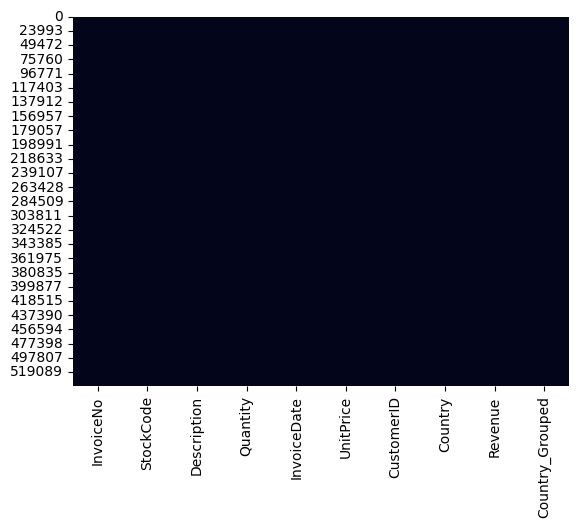

In [38]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing values are handled in intial preprocessing because there is no customer ID such rows are dropped assuming they are not valid rows in dataset

### 2. Drop Unnecesary columns

In [39]:
# Subsetting data based on use for segmentation
df = df[['CustomerID', 'StockCode', 'InvoiceNo', 'Quantity', 'UnitPrice', 'Country', 'InvoiceDate']]

In [40]:
df.head(2)

,CustomerID,StockCode,InvoiceNo,Quantity,UnitPrice,Country,InvoiceDate
0,17850.0,85123A,536365,6,2.55,United Kingdom,2010-12-01 08:26:00
1,17850.0,71053,536365,6,3.39,United Kingdom,2010-12-01 08:26:00


### 3. Handling Outliers

For this dataset outlier handling is not desirable because the outliers itself might be a segment with high value. So skipping this step now.

### 4. Feature Enginnering

In [41]:
# Create a 'Revenue' column by multiplying 'Quantity' and 'UnitPrice'
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['Date'] = pd.to_datetime(df['InvoiceDate'])

In [42]:
# Calculate Recency, Frequency, Monetary features for each customer
rfm_df = df.groupby('CustomerID').agg({
    'Date': 'max',  # Latest purchase date for Recency
    'InvoiceNo': 'nunique',  # Number of transactions for Frequency
    'Revenue': 'sum'  # Total revenue for Monetary
}).reset_index()

date_for_recency = df['Date'].max() + pd.Timedelta(days=1)
# Calculate Recency in days from the latest purchase date
rfm_df['Recency'] = (pd.to_datetime(date_for_recency) - rfm_df['Date']).dt.days

# Drop unnecessary columns
rfm_df = rfm_df[['CustomerID', 'Recency', 'InvoiceNo', 'Revenue']]



In [43]:
rfm_df.rename(columns = {'InvoiceNo':'Frequency', 'Revenue':'Monetary'},inplace = True)

In [44]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [45]:
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 306.48249999999996, 0.5: 668.57, 0.75: 1660.5974999999999}}

In [46]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [47]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,1,77183.60,4,4,1
1,12347.0,2,7,4310.00,1,1,1
2,12348.0,75,4,1797.24,3,2,1
3,12349.0,19,1,1757.55,2,4,1
4,12350.0,310,1,334.40,4,4,3


In [48]:

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,12346.0,326,1,77183.60,4,4,1,441,9
1,12347.0,2,7,4310.00,1,1,1,111,3
2,12348.0,75,4,1797.24,3,2,1,321,6
3,12349.0,19,1,1757.55,2,4,1,241,7
4,12350.0,310,1,334.40,4,4,3,443,11


In [49]:
rfm_df['RFMScore'].value_counts()

11    495
9     474
10    469
3     461
12    440
7     424
6     423
8     420
5     397
4     335
Name: RFMScore, dtype: int64

### 5. Data Transformation

In [50]:
# function for ploting feature distribution
def plot_feature_distribution(data, feature_name, ax):
    sns.histplot(data[feature_name], ax=ax)
    ax.axvline(data[feature_name].mean(), color='magenta', linestyle='dashed', linewidth=1)
    ax.axvline(data[feature_name].median(), color='cyan', linestyle='dashed', linewidth=1)
    ax.set_title(f"{feature_name} Distribution")

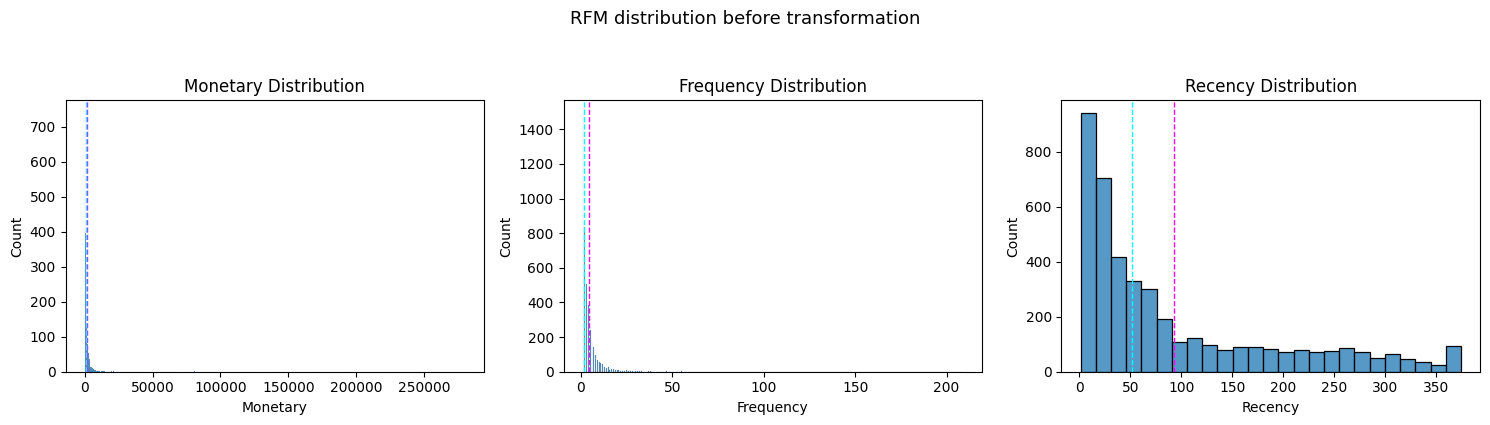

In [51]:
# Before transformation
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot each feature
features = ['Monetary', 'Frequency', 'Recency']
for feature, ax in zip(features, axes):
    plot_feature_distribution(rfm_df, feature, ax)

plt.suptitle("RFM distribution before transformation", y=1.05, fontsize=13)

# Adjust layout
plt.tight_layout()
plt.show()


In [52]:
#Replace negative and zero values to handle value exception during log transformation
rfm_df['Monetary'] = [x if x > 0 else 1 for x in rfm_df['Monetary']]

In [53]:
# Transformed features
rfm_df['log_Recency'] = rfm_df['Recency'].apply(math.log)
rfm_df['log_Frequency'] = rfm_df['Frequency'].apply(math.log)
rfm_df['log_Monetary'] = rfm_df['Monetary'].apply(math.log)

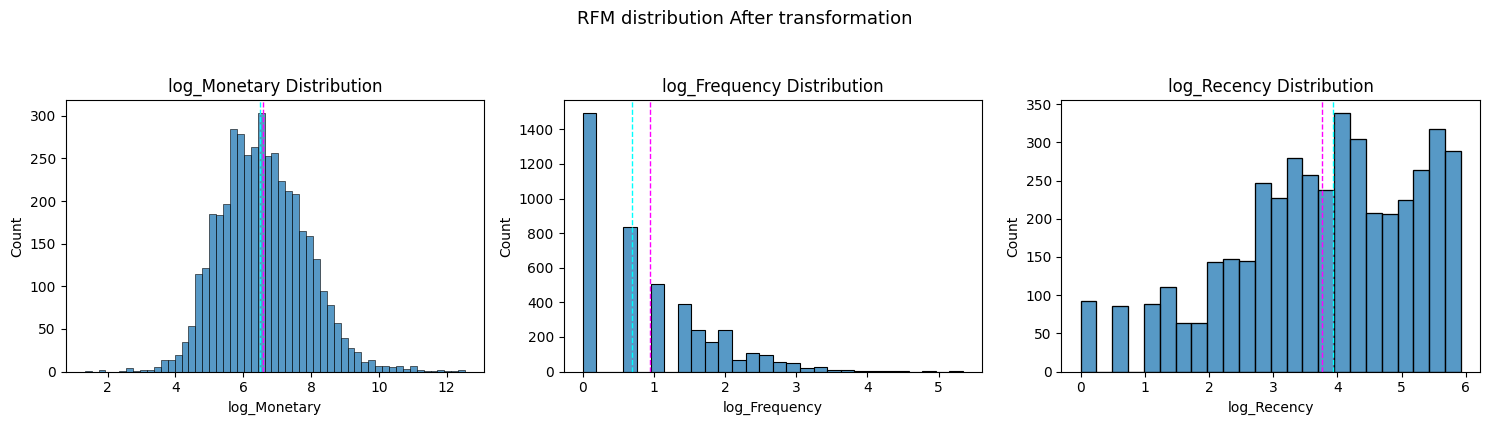

In [54]:
# After transformation
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot each feature
features = ['log_Monetary', 'log_Frequency', 'log_Recency']
for feature, ax in zip(features, axes):
    plot_feature_distribution(rfm_df, feature, ax)

plt.suptitle("RFM distribution After transformation", y=1.05, fontsize=13)

# Adjust layout
plt.tight_layout()
plt.show()


### 6. Feature Scaling

In [55]:
feature_vector=['log_Recency','log_Frequency','log_Monetary']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

## ***6.Modelling - Segmentation based on RFM values***

### **Model -1** Using K-Means

#### **Applying Silhouette  Method on Recency ,Frequency and Monetary**

For n_clusters = 2 The average silhouette_score is : 0.43151947887128933
For n_clusters = 3 The average silhouette_score is : 0.3398044354801835
For n_clusters = 4 The average silhouette_score is : 0.334107314550516
For n_clusters = 5 The average silhouette_score is : 0.3060246975052443
For n_clusters = 6 The average silhouette_score is : 0.30994340516739916
For n_clusters = 7 The average silhouette_score is : 0.3083300492095676
For n_clusters = 8 The average silhouette_score is : 0.2932428277727702
For n_clusters = 9 The average silhouette_score is : 0.2797697290900164
For n_clusters = 10 The average silhouette_score is : 0.2867274001816763
For n_clusters = 11 The average silhouette_score is : 0.2878633813285704
For n_clusters = 12 The average silhouette_score is : 0.2875888247167418


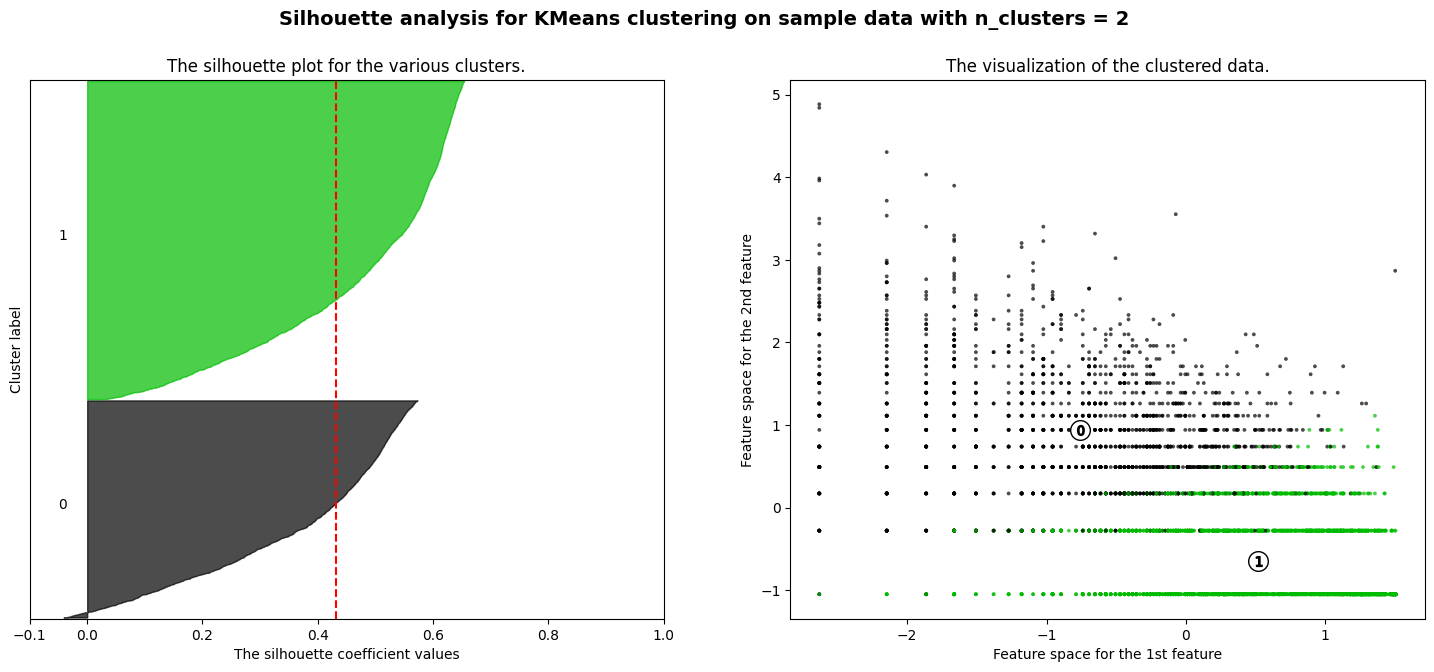

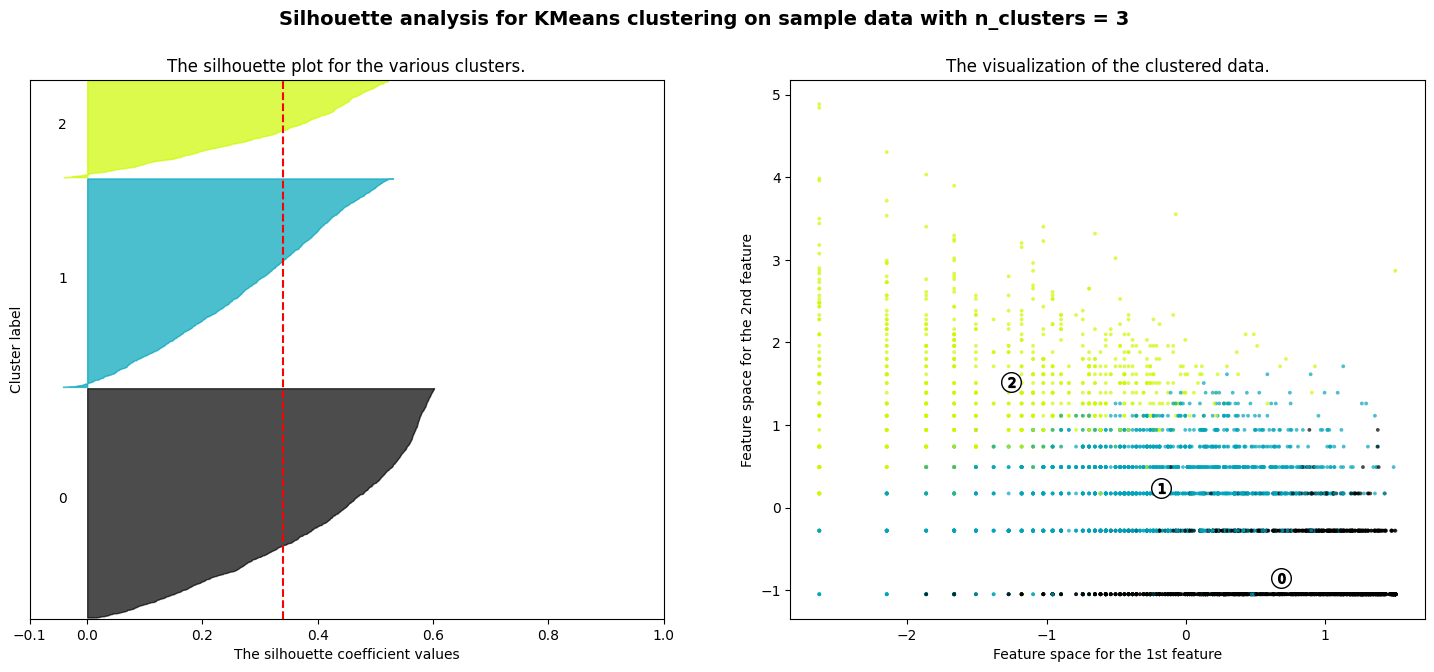

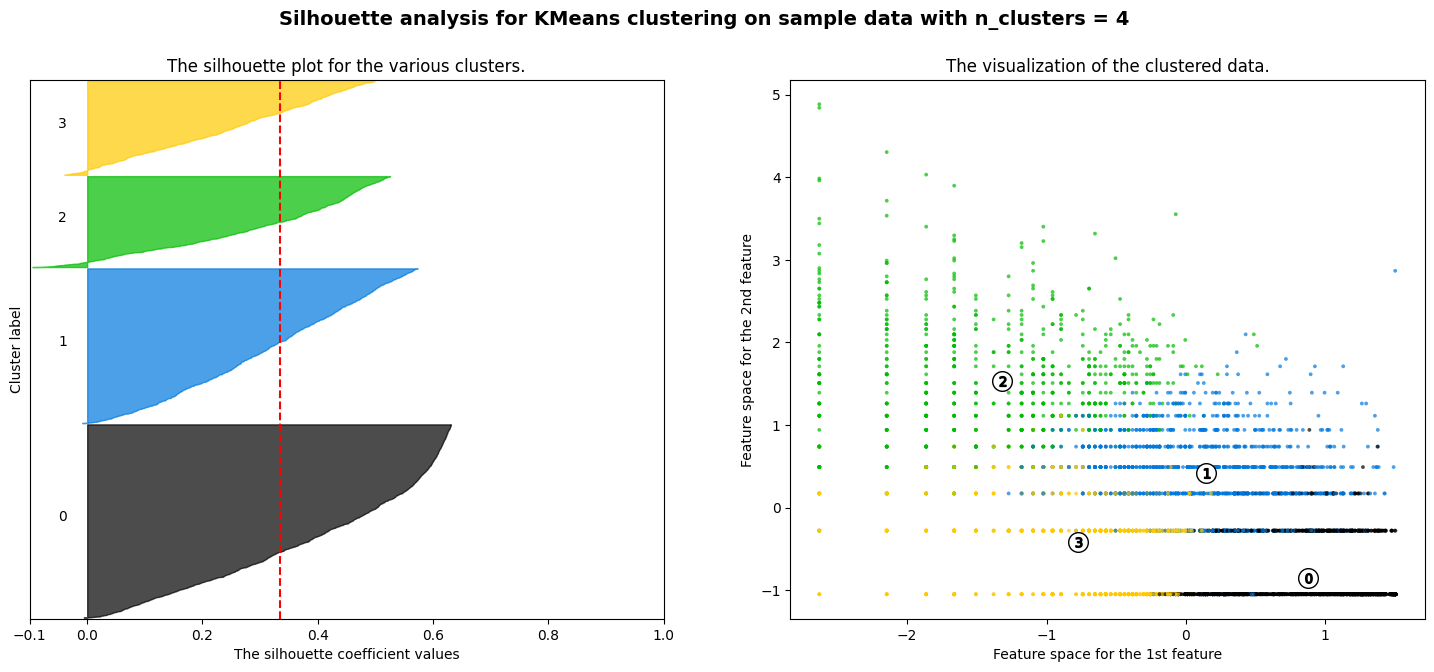

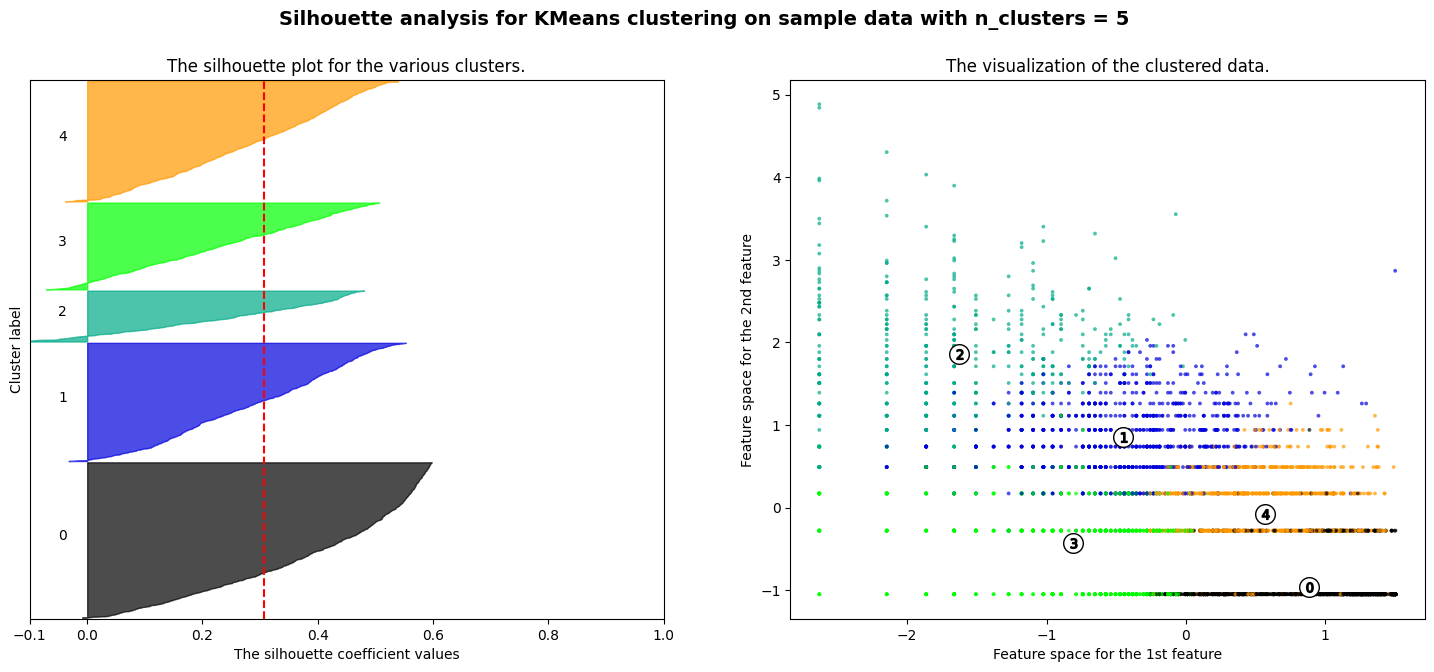

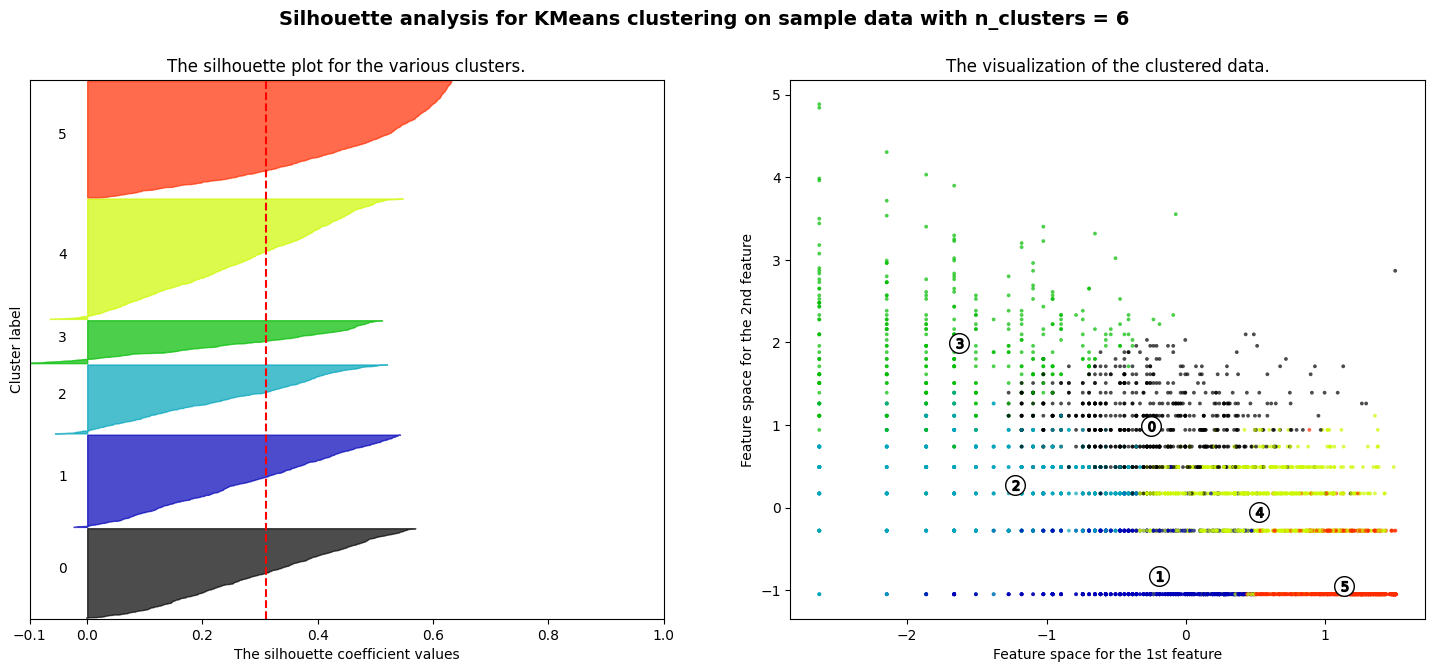

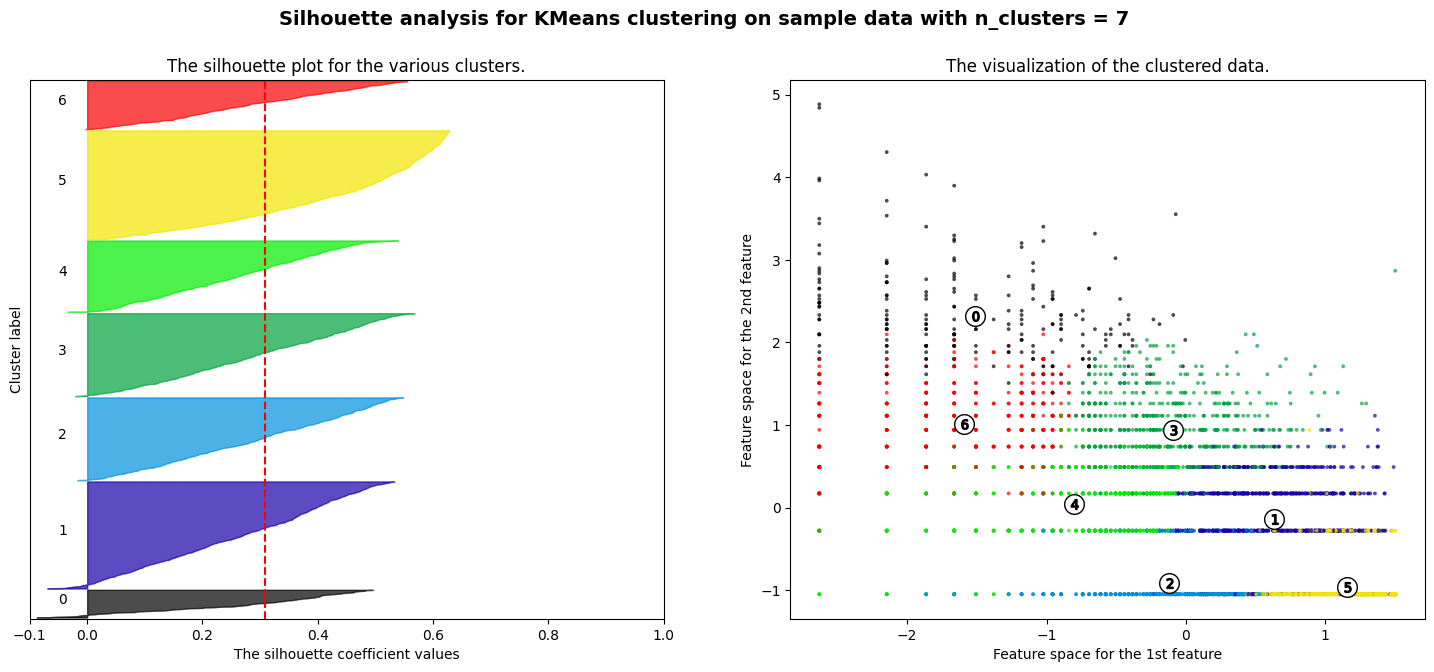

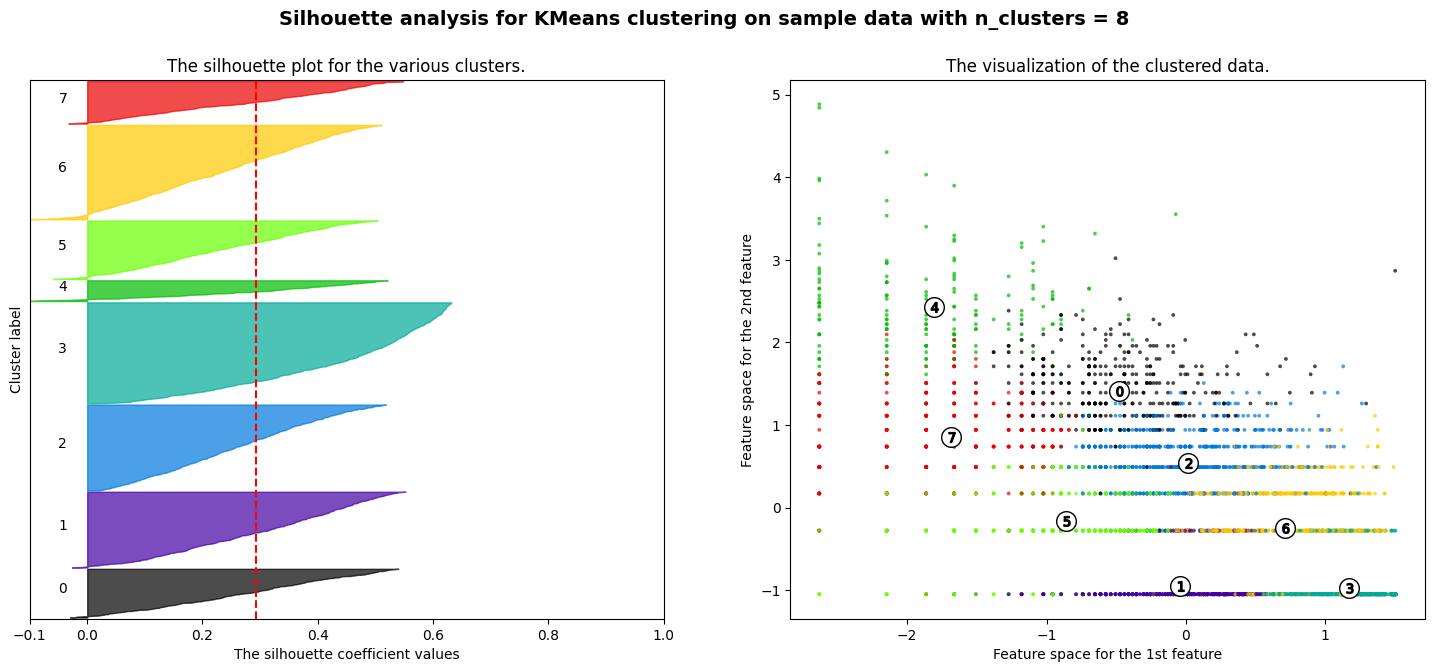

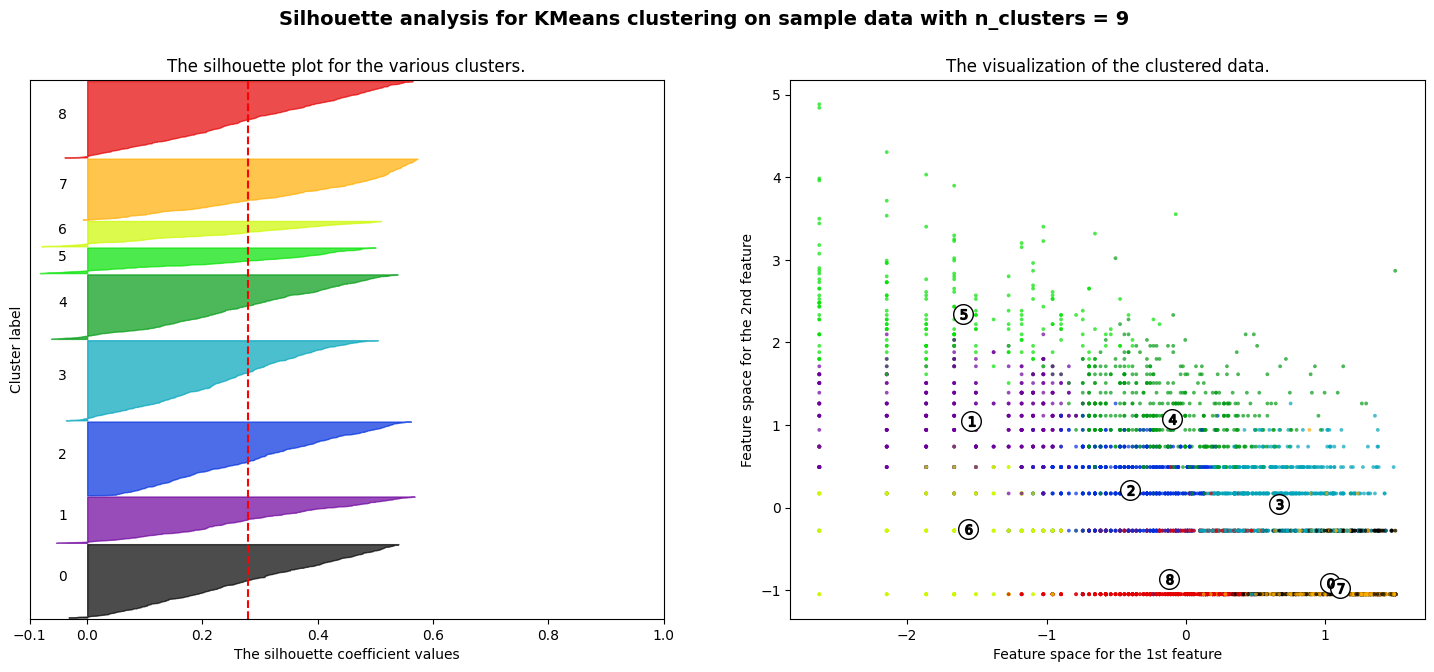

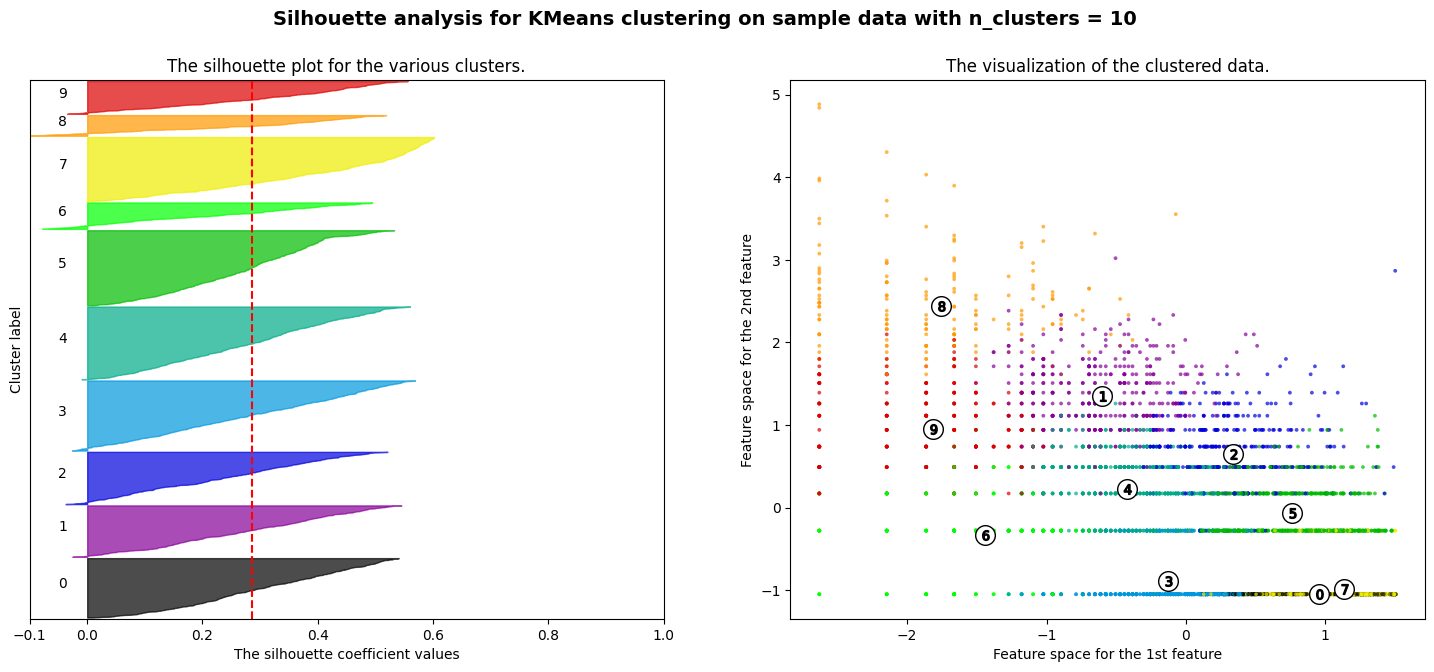

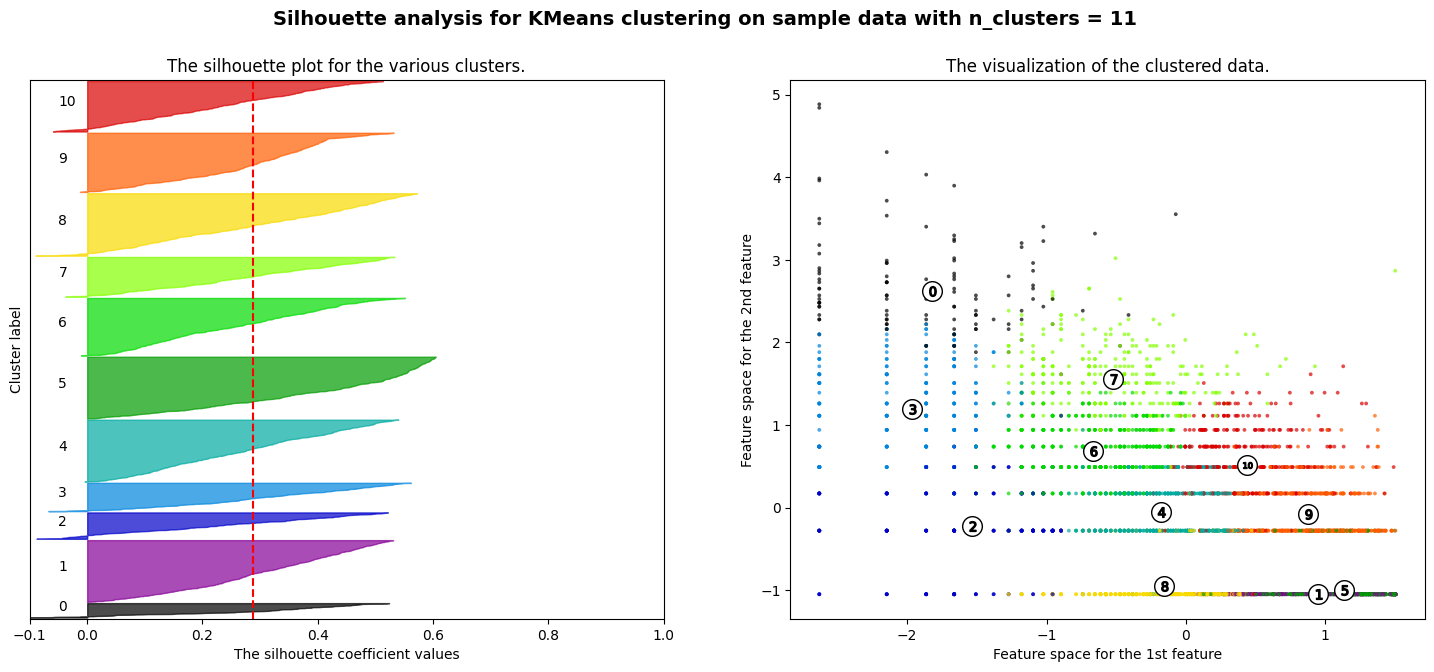

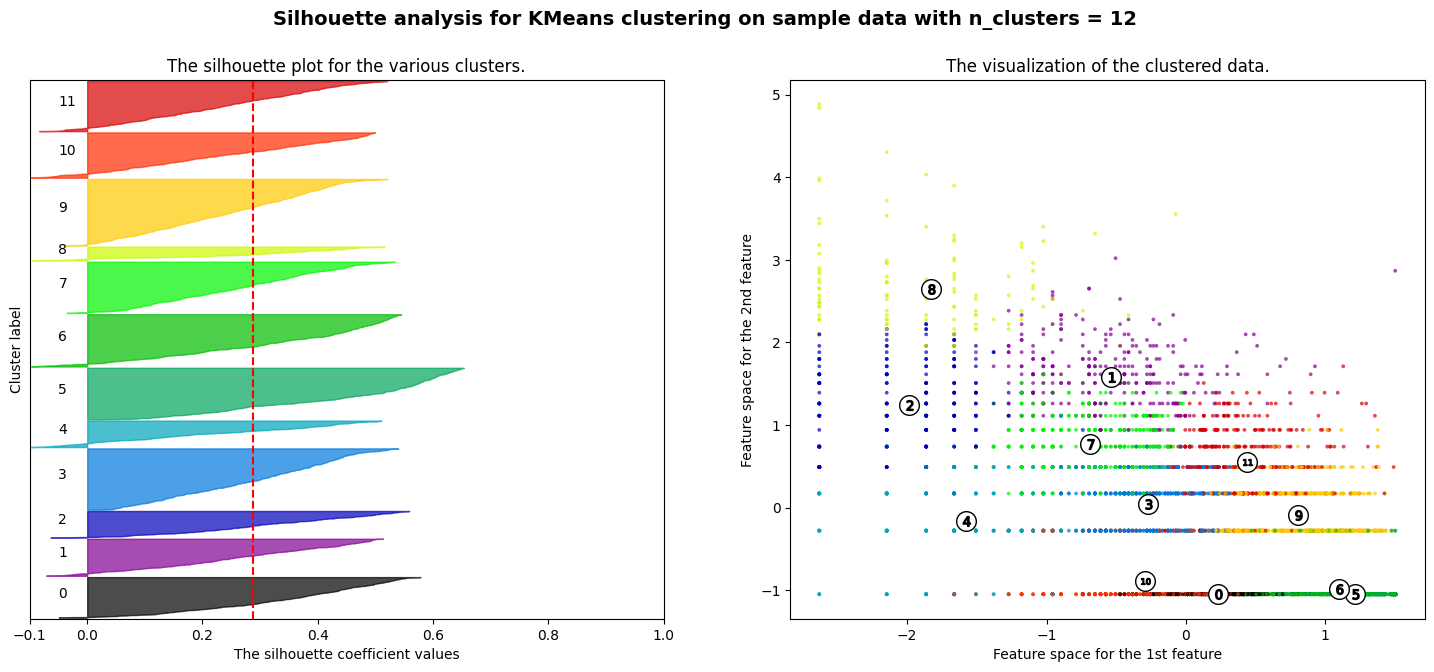

In [56]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)


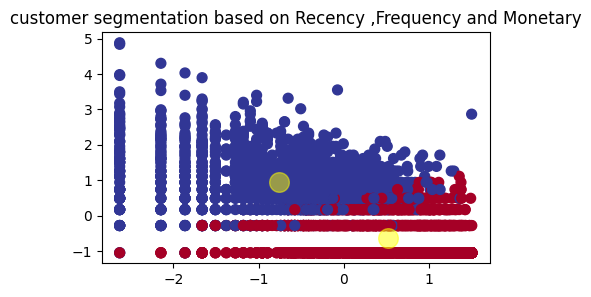

In [58]:
plt.figure(figsize=(5,3))
plt.title('customer segmentation based on Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

####**Applying Elbow Method on Recency ,Frequency and Monetary**


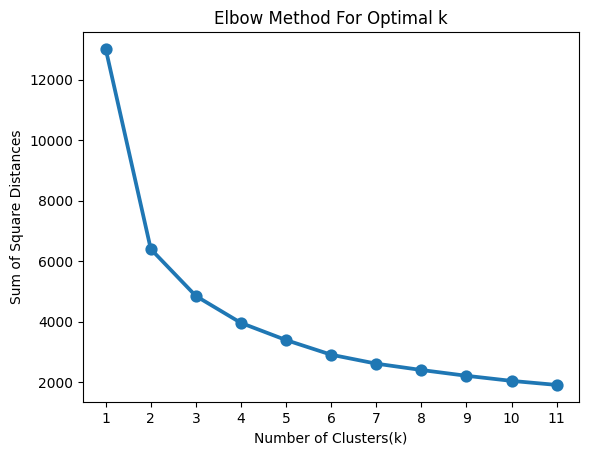

In [59]:
sum_of_sq_dist = {}
for k in range(1,12):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [60]:

#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,log_Recency,log_Frequency,log_Monetary,Cluster
0,12346.0,326,1,77183.60,4,4,1,441,9,5.786897,0.000000,11.253942,1
1,12347.0,2,7,4310.00,1,1,1,111,3,0.693147,1.945910,8.368693,2
2,12348.0,75,4,1797.24,3,2,1,321,6,4.317488,1.386294,7.494007,1
3,12349.0,19,1,1757.55,2,4,1,241,7,2.944439,0.000000,7.471676,1
4,12350.0,310,1,334.40,4,4,3,443,11,5.736572,0.000000,5.812338,0
5,12352.0,36,8,2506.04,2,1,1,211,4,3.583519,2.079442,7.826459,2
6,12353.0,204,1,89.00,4,4,4,444,12,5.318120,0.000000,4.488636,0
7,12354.0,232,1,1079.40,4,4,2,442,10,5.446737,0.000000,6.984161,0
8,12355.0,214,1,459.40,4,4,3,443,11,5.365976,0.000000,6.129921,0
9,12356.0,23,3,2811.43,2,2,1,221,5,3.135494,1.098612,7.941449,1


### **Model-2** Using hierarchical clustering

####**Dendogram to find the optimal number of clusters**

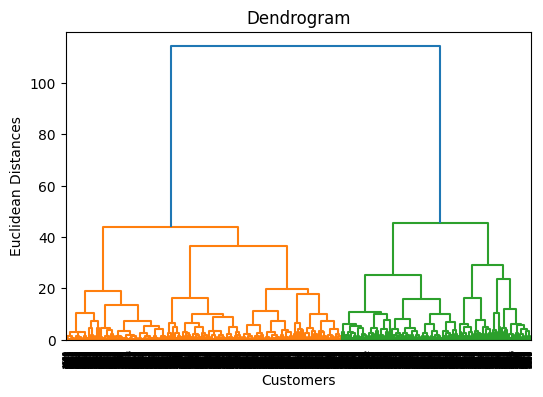

In [61]:
# Using the dendogram to find the optimal number of clusters

plt.figure(figsize=(6,4))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [62]:
# Fitting hierarchical clustering to the mall dataset

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

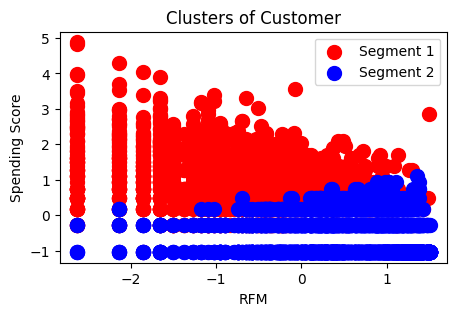

In [63]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(5,3))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Segment 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Segment 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score')
plt.legend()
plt.show()

By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 2

### **Model-3** Using DBSCAN

####**Applying DBSCAN to Recency ,Frequency and Monetary**

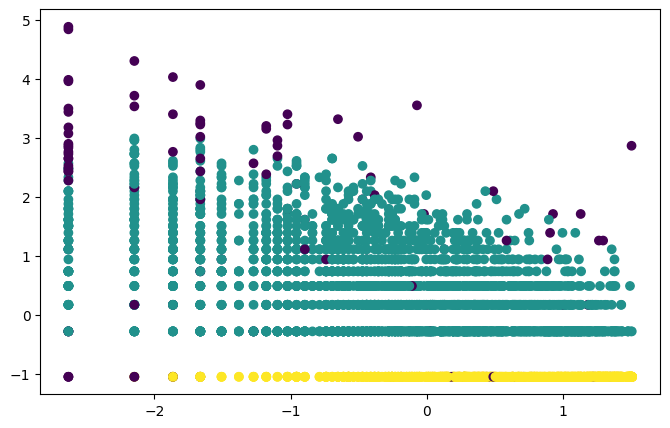

In [64]:

y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=y_pred)

we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3 (which will be 2 clusters and 1 segment for outlier)


#**Summary**

In [65]:
# Specify the Column Names while initializing the Table
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add row

myTable.add_row(['1',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['2',"K-Means with Elbow method  ", "RFM", "2"])
myTable.add_row(['3',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['4',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  | RFM  |             2             |
|   2    |  K-Means with Elbow method     | RFM  |             2             |
|   3    |   Hierarchical clustering      | RFM  |             2             |
|   4    |            DBSCAN              | RFM  |             3             |
+--------+--------------------------------+------+---------------------------+


On Applying different techniques it is ideal to segment the customers into 2 segments. Assuming here the first segemnt is wholesalers and the other is average customer based on their RFM values. There can be one more cluster which was seen in DBSCAN technique where there are few customers who are either high value customers who cannot be classified in the average customer group but doesnot come under wholesalers as well.

# **Conclusion**

### **Strategies and Customer Segments**

**1. High-Value Segment:**

Objective: Retain and maximize value.

Strategies:
Offer personalized promotions or loyalty programs.
Provide exclusive access to premium products/services.
Gather feedback to enhance their experience.

**2. Churn-Prone Segment:**

Objective: Prevent churn and re-engage.

Strategies:
Implement targeted marketing campaigns to re-engage.
Provide incentives or discounts for repeat purchases.
Understand reasons for potential churn through surveys.

**3. Medium-Value or Average Segment :**

Objective: Increase engagement and loyalty.

Strategies:
Introduce loyalty programs or tiered rewards.
Cross-sell or upsell relevant products/services.
Monitor customer feedback and address concerns.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***